In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Args

In [2]:
pd.set_option('display.max_rows', len(df))
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)

NameError: name 'df' is not defined

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
class smart_dict(dict):
    def __missing__(self, key):
        return False

In [240]:
def calc_binding_concordance(df, clonotype_fmt):
    #assert df.size > 0, "df empty"
    gems_per_specificity = df.groupby([clonotype_fmt,'peptide']).gem.count().to_dict()
    df['gems_per_specificity'] = df.set_index([clonotype_fmt,'peptide']).index.map(gems_per_specificity)

    gems_per_clonotype = df.groupby([clonotype_fmt]).gem.count().to_dict()
    df['gems_per_clonotype'] = df[clonotype_fmt].map(gems_per_clonotype)
    
    df['binding_concordance'] = df.gems_per_specificity / df.gems_per_clonotype

In [241]:
EXP = "exp3"
delta = "50"

# Input

In [242]:
GEMS = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/ct/umi_delta" + delta + "/exclude_single-chain_TCRs/unique_gems/b2.t1.ecs_False.ess_False.lst"

In [243]:
TCR_BARCODE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv"

In [244]:
SIMILARITY = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/similarity_assessment/cdr3/kernel_similarity_scores/cdr3.csv"

In [245]:
ORIGINAL = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_TCR/processed/cellranger_out/TCR_VDJ/outs/all_contig_annotations.csv"

# Load

In [247]:
GEMS

'/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/ct/umi_delta50/exclude_single-chain_TCRs/unique_gems/b2.t1.ecs_False.ess_False.lst'

In [249]:
unique_gems = np.loadtxt(GEMS, dtype=str)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-249-d424e4a88a96>", line 1, in <module>
    unique_gems = np.loadtxt(GEMS, dtype=str)
  File "/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py", line 968, in loadtxt
    fh = np.lib._datasource.open(fname, 'rt', encoding=encoding)
  File "/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/_datasource.py", line 268, in open
    ds = DataSource(destpath)
  File "/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/_datasource.py", line 325, in __init__
    self._destpath = os.path.abspath(destpath)
  File "/Users/herpov/opt/anaconda3/lib/python3.7/posixpath.py", line 383, in abspath
    cwd = os.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

During handling of the above exception, anothe

FileNotFoundError: [Errno 2] No such file or directory

In [186]:
df = pd.read_csv(TCR_BARCODE)

In [187]:
df = df[df.gem.isin(unique_gems)]

In [188]:
calc_binding_concordance(df, 'ct')

In [189]:
sim_df = pd.read_csv(SIMILARITY)

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [190]:
tcr_df = pd.read_csv(ORIGINAL)

In [191]:
sim_df = sim_df[sim_df.gem.isin(unique_gems)]

In [192]:
sim_df

,gem,ct,clonotype,num_clonotype,epitope,peptide,umi_count_mhc,umi_count_tcr,binding_concordance,cdr3_TRA,...,TTTGGTTAGTTTCCTT-1,TTTGGTTCAATGTAAG-1,TTTGGTTCACGTGAGA-1,TTTGGTTCAGATAATG-1,TTTGGTTCAGTAAGCG-1,TTTGGTTTCTCGAGTA-1,TTTGTCAAGATCCCGC-1,TTTGTCACAGCAGTTT-1,TTTGTCATCAACGGCC-1,TTTGTCATCAAGCCTA-1
1,AAACCTGAGTTCGATC-1,24.0,clonotype9,9.0,v9,YSEHPTFTSQY,2.0,8.0,0.181818,CALNTGGFKTIF,...,1.457512,1.457512,1.501511,0.0,1.531443,1.457512,1.543892,1.504930,1.543892,0.0
6,AAACGGGCAGGTCTCG-1,7.0,clonotype4,4.0,v13,NLVPMVATV,2.0,16.0,0.018868,CAARPGAQKLVF,...,1.495427,1.495427,1.541784,0.0,1.546195,1.495427,1.583865,1.537643,1.583865,0.0
9,AAAGATGAGGGCTTGA-1,108.0,clonotype527,527.0,v9,YSEHPTFTSQY,2.0,19.0,1.000000,CLVGYNTDKLIF,...,1.439016,1.439016,1.557892,0.0,1.477758,1.439016,1.525541,1.448529,1.525541,0.0
10,AAAGATGAGGTGACCA-1,782.0,clonotype528,528.0,v13,NLVPMVATV,7.0,9.0,1.000000,CARNTGNQFYF,...,1.448005,1.448005,1.605217,0.0,1.535540,1.448005,1.580050,1.521111,1.580050,0.0
15,AAAGATGTCCGGGTGT-1,290.0,clonotype122,122.0,v15,VTEHDTLLY,2.0,106.0,0.250000,CALDVDTGGFKTIF,...,1.485589,1.485589,1.571243,0.0,1.610860,1.485589,1.573720,1.548701,1.573720,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,TTTGGTTAGACACTAA-1,260.0,clonotype119,119.0,MELPEP-044,KTWGQYWQV,3.0,71.0,0.714286,CAVCSDYKLSF,...,1.499826,1.499826,1.581546,0.0,1.510757,1.499826,1.587103,1.498096,1.587103,0.0
2336,TTTGGTTAGCGAGAAA-1,27.0,clonotype10,10.0,v15,VTEHDTLLY,9.0,17.0,0.951220,CAARGGAQKLVF,...,1.480550,1.480550,1.528157,0.0,1.543215,1.480550,1.583104,1.556297,1.583104,0.0
2337,TTTGGTTAGTTTCCTT-1,2.0,clonotype1,1.0,v15,VTEHDTLLY,2.0,39.0,0.204082,CAVRSAYSGAGSYQLTF,...,2.000000,2.000000,1.439090,0.0,1.517478,2.000000,1.546125,1.521230,1.546125,0.0
2340,TTTGGTTCAGTAAGCG-1,171.0,clonotype66,66.0,MELPEP-036,YLEPGPVTA,2.0,65.0,0.833333,CATDAGGTSYGKLTF,...,1.517479,1.517479,1.521600,0.0,2.000000,1.517479,1.585542,1.789021,1.585542,0.0


# Main

In [193]:
cols = ['num_clonotype', 'ct','cdr3_lst_TRA', 'cdr3_lst_TRB',
        'umi_count_lst_mhc', 'multiplets_mhc',
        'binding_concordance', 'peptide', 'peptide_HLA_lst', 'imputed_peptide']

In [194]:
#df['true_clonotype'] = np.where((df.multiplets_mhc == 1) & (df.chain_count_TRA == 1) & (df.chain_count_TRB ==1 ), df.ct, -1)

In [195]:
#df['true_peptide'] = np.where((df.multiplets_mhc == 1) & (df.chain_count_TRA == 1) & (df.chain_count_TRB ==1 ), df.peptide, '')

## Annotate unambiguous specificities (reference specificities)

In [196]:
query_filter = ((df.multiplets_mhc == 1) &
                (df.chain_count_TRA == 1) &
                (df.chain_count_TRB == 1 ) &
                (df.binding_concordance == 1))

Assert that the subset only consist of unique pairs of clonotype and peptide

In [197]:
assert df[query_filter].groupby(['ct']).peptide.unique().apply(lambda x: False if len(x)>1 else True).all()

Makes a dict of all uniquely annotated clonotypes with uniquely annotated peptide MHCs

In [198]:
dct = df[query_filter].groupby('gem').peptide.unique().apply(lambda x: x[0] if len(x)==1 else np.nan).to_dict()

In [199]:
df['imputed_peptide'] = df.gem.map(dct)

In [200]:
sum(~df.imputed_peptide.isna())

114

In [201]:
df.groupby(['imputed_peptide']).cdr3_comb.unique().apply(pd.Series).stack().value_counts()

CAVDSFRYSGGGADGLTFCASSMGTIGGKLFF    1
CAVHNNDMRFCASRPGQLSGNTIYF           1
CAVRAGGYQKVTFCASSVGQGVTYEQYF        1
CVVNNALGNEKLTFCASSVGGDTGELFF        1
CAYSPSGTYKYIFCASSLQGRGDTQYF         1
                                   ..
CAVMNAGNMLTFCASTLTEVFAGELFF         1
CAVGTDSWGKLQFCATSKDSSNYEQYF         1
CILPLAGGTSYGKLTFCASSLGQAYEQYF       1
CATDVIQGAQKLVFCASSLEPSTNTEAFF       1
CVVSSLSNDYKLSFCASSPGGSLSSYNSPLHF    1
Length: 96, dtype: int64

## Annotate BC multiplets (concordance of 1)

In [140]:
def impute_peptides(query_filter, query_grp_sbj):
    query_clonotypes = df[query_filter][query_grp_sbj].unique()

    reference_indexes = df[~df.imputed_peptide.isna()].index
    reference_clonotypes = df[~df.imputed_peptide.isna()][query_grp_sbj].isin(query_clonotypes)
    reference_clonotype_indexes = reference_clonotypes.index[reference_clonotypes.values]

    dct = df.loc[reference_clonotype_indexes].groupby(query_grp_sbj).peptide.unique().apply(lambda x: x[0] if len(x)==1 else np.nan).to_dict()

    imputed_peptides = df[query_filter][query_grp_sbj].map(dct)
    imputed_peptide_indexes = imputed_peptides.index[~imputed_peptides.isna()]

    query_indexes = imputed_peptides[imputed_peptides.index.isin(set(imputed_peptide_indexes)-set(reference_indexes))].index #set(imputed_peptide_indexes) - set(reference_indexes)

    df.loc[query_indexes, 'imputed_peptide'] = imputed_peptides[imputed_peptides.index.isin(query_indexes)].values
    
    return (dct,
            imputed_peptides[imputed_peptides.index.isin(set(imputed_peptide_indexes) - set(reference_indexes))],
            sum(~df.imputed_peptide.isna()),
            df.loc[query_indexes, ['ct', 'cdr3_lst_TRA', 'cdr3_lst_TRB', 'peptide_HLA_lst', 'peptide', 'imputed_peptide']])

In [140]:
def impute_peptides_from_similarity(query_filter, query_grp_sbj):

    reference_gems = df[~df.imputed_peptide.isna()].gem
    #reference_clonotypes = df[~df.imputed_peptide.isna()][query_grp_sbj].isin(query_clonotypes)
    #reference_clonotype_indexes = reference_clonotypes.index[reference_clonotypes.values]
    
    query_gems = set(df[query_filter].gem) - set(reference_gems)
    
    similarity_matrix = sim_df.loc[sim_df.gem.isin(query_gems), reference_gems]
    
    imputed_peptide_gems = similarity_matrix.apply(pd.Series.idxmax, axis=1)
    dct = 

    dct = df.loc[reference_clonotype_indexes].groupby(query_grp_sbj).peptide.unique().apply(lambda x: x[0] if len(x)==1 else np.nan).to_dict()

    imputed_peptides = df[query_filter][query_grp_sbj].map(dct)
    imputed_peptide_indexes = imputed_peptides.index[~imputed_peptides.isna()]

    query_indexes = imputed_peptides[imputed_peptides.index.isin(set(imputed_peptide_indexes)-set(reference_indexes))].index #set(imputed_peptide_indexes) - set(reference_indexes)

    df.loc[query_indexes, 'imputed_peptide'] = imputed_peptides[imputed_peptides.index.isin(query_indexes)].values
    
    return (dct,
            imputed_peptides[imputed_peptides.index.isin(set(imputed_peptide_indexes) - set(reference_indexes))],
            sum(~df.imputed_peptide.isna()),
            df.loc[query_indexes, ['ct', 'cdr3_lst_TRA', 'cdr3_lst_TRB', 'peptide_HLA_lst', 'peptide', 'imputed_peptide']])

In [202]:
query_filter = ((df.multiplets_mhc > 1) &
                (df.chain_count_TRA == 1) &
                (df.chain_count_TRB == 1 ) &
                (df.binding_concordance == 1))

In [203]:
reference_gems = df[~df.imputed_peptide.isna()].gem

In [205]:
query_gems = set(df[query_filter].gem) - set(reference_gems)

In [209]:
similarity_matrix = sim_df.loc[sim_df.gem.isin(query_gems), reference_gems]

In [224]:
imputed_peptide_gems = similarity_matrix.apply(pd.Series.idxmax, axis=1).to_frame(name='gem')

In [229]:
imputed_peptide_gems

,gem,imputed_peptides
67,CTCATTACATCACGAT-1,FRQKTNLIL
76,CGATGGCTCCGTTGCT-1,VTEHDTLLY
97,TTCTCCTTCAGCGATT-1,KTWGQYWQV
123,GTCAAGTGTCTGATTG-1,KTWGQYWQV
138,GTCAAGTGTCTGATTG-1,KTWGQYWQV
...,...,...
2269,AACACGTGTGGTCTCG-1,VTEHDTLLY
2285,ACCAGTAAGAGGTTAT-1,NLVPMVATV
2299,ACTGAACAGTGAAGAG-1,YSEHPTFTSQY
2301,TCGCGAGCATTGGTAC-1,ILRGSVAHK


In [226]:
dct = df[df.gem.isin(imputed_peptide_gems.gem)].groupby('gem').peptide.unique().apply(lambda x: x[0] if len(x)==1 else np.nan).to_dict()

In [228]:
imputed_peptide_gems['imputed_peptides'] = imputed_peptide_gems.gem.map(dct)

In [233]:
df.loc[imputed_peptide_gems.index, 'imputed_peptide'] = imputed_peptide_gems.imputed_peptides

In [235]:
df.loc[imputed_peptide_gems.index,cols]

,num_clonotype,ct,cdr3_lst_TRA,cdr3_lst_TRB,umi_count_lst_mhc,multiplets_mhc,binding_concordance,peptide,peptide_HLA_lst,imputed_peptide
67,234.0,507.0,['CVVSDLRATSGTYKYIF'],['CSASPRISYNEQFF'],"[1, 2]",2.0,1.0,YSEHPTFTSQY,['VTEHDTLLY A0101' 'YSEHPTFTSQY A0101'],FRQKTNLIL
76,604.0,2704.0,['CAAKGGSEKLVF'],['CASSLQGVGAKNIQYF'],"[1, 8]",2.0,1.0,VTEHDTLLY,['NLVPMVATV A0201' 'VTEHDTLLY A0101'],VTEHDTLLY
97,628.0,1212.0,['CAESPDGQKLLF'],['CASSLGGGEQYF'],"[1, 2, 6]",3.0,1.0,KTWGQYWQV,['p1.a1 p*A0101' 'TLADFDPRV A0201' 'KTWGQYWQV ...,KTWGQYWQV
123,644.0,1234.0,['CAEKDDKIIF'],['CASSQGENTGELFF'],"[1, 9]",2.0,1.0,KTWGQYWQV,['VTEHDTLLY A0101' 'KTWGQYWQV A0201'],KTWGQYWQV
138,149.0,373.0,['CAVKEDRLMF'],['CASSQGWNTGELFF'],"[1, 13]",2.0,1.0,KTWGQYWQV,['KVHPVIWSL A0201' 'KTWGQYWQV A0201'],KTWGQYWQV
...,...,...,...,...,...,...,...,...,...,...
2269,10.0,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],"[1, 4]",2.0,1.0,VTEHDTLLY,['YSEHPTFTSQY A0101' 'VTEHDTLLY A0101'],VTEHDTLLY
2285,2680.0,1083.0,['CAVNVGDKLIF'],['CASSVADTAQYF'],"[1, 2]",2.0,1.0,SLLMWITQA,['NLVPMVATV A0201' 'SLLMWITQA A0201'],NLVPMVATV
2299,2695.0,1985.0,['CAMREGQTGANNLFF'],['CASSLGTSGYNEQFF'],"[1, 2]",2.0,1.0,TVYPPSSTAK,['YSEHPTFTSQY A0101' 'TVYPPSSTAK A0301'],YSEHPTFTSQY
2301,500.0,862.0,['CAMREDPIIGSNYKLTF'],['CASSLDPDTQYF'],"[1, 1, 1, 1, 4]",5.0,1.0,VTEHDTLLY,['FLYALALLL A0201' 'VSDGGPNLY A0101' 'GILGFVFT...,ILRGSVAHK


Impute from clonotype annotation

In [141]:
query_filter = ((df.multiplets_mhc > 1) &
                (df.chain_count_TRA == 1) &
                (df.chain_count_TRB == 1 ) &
                (df.binding_concordance == 1))

In [142]:
a, b, c, d = impute_peptides(query_filter, 'ct')

{1672, 138, 140, 1805, 399, 2198, 1943, 663, 2200, 1308, 416, 2336, 934, 1835, 686, 692, 311, 699, 956, 1599, 321, 1729, 1868, 1485, 1869, 338, 1621, 1238, 2262, 2269, 2146, 483, 487, 2151, 503, 1535}
{2048, 519, 530, 1050, 31, 34, 2087, 1576, 1065, 1068, 46, 49, 1074, 563, 1077, 1081, 1083, 62, 1088, 65, 1089, 80, 1616, 596, 1110, 2142, 611, 1131, 626, 1651, 1143, 133, 648, 1160, 1163, 1675, 656, 2194, 1174, 155, 668, 166, 679, 1709, 1712, 2225, 187, 2238, 1727, 2242, 709, 198, 2251, 2254, 2260, 1239, 1752, 219, 1249, 227, 2280, 752, 1779, 244, 255, 2310, 2313, 1292, 795, 1314, 1316, 1828, 1833, 1837, 1335, 1344, 1861, 331, 851, 1883, 1885, 1888, 355, 367, 881, 1906, 1910, 890, 892, 1405, 1923, 1425, 1949, 1441, 1960, 941, 435, 1973, 953, 443, 445, 460, 2002, 1493, 985, 2009, 993, 1507, 485, 497, 1526, 2044, 2045, 510}


In [143]:
a

{27.0: 'VTEHDTLLY',
 99.0: 'NLVPMVATV',
 122.0: 'FLRGRAYGL',
 135.0: 'GLCTLVAML',
 140.0: 'NLVPMVATV',
 206.0: 'YSEHPTFTSQY',
 260.0: 'KTWGQYWQV',
 265.0: 'KTWGQYWQV',
 285.0: 'VTEHDTLLY',
 373.0: 'KTWGQYWQV',
 432.0: 'VTEHDTLLY',
 814.0: 'KTWGQYWQV'}

In [144]:
b

138       KTWGQYWQV
140       VTEHDTLLY
311       VTEHDTLLY
321       GLCTLVAML
338       VTEHDTLLY
399       NLVPMVATV
416       FLRGRAYGL
483       NLVPMVATV
487       VTEHDTLLY
503       VTEHDTLLY
663       KTWGQYWQV
686     YSEHPTFTSQY
692       KTWGQYWQV
699       KTWGQYWQV
934       VTEHDTLLY
956       VTEHDTLLY
1238      KTWGQYWQV
1308      VTEHDTLLY
1485      KTWGQYWQV
1535      VTEHDTLLY
1599      GLCTLVAML
1621      VTEHDTLLY
1672      VTEHDTLLY
1729      VTEHDTLLY
1805      VTEHDTLLY
1835      VTEHDTLLY
1868      VTEHDTLLY
1869      KTWGQYWQV
1943      VTEHDTLLY
2146      KTWGQYWQV
2151    YSEHPTFTSQY
2198      VTEHDTLLY
2200      VTEHDTLLY
2262      NLVPMVATV
2269      VTEHDTLLY
2336      VTEHDTLLY
Name: ct, dtype: object

In [145]:
c

150

In [146]:
d.sort_values(by=['cdr3_lst_TRA', 'cdr3_lst_TRB', 'peptide'])

,ct,cdr3_lst_TRA,cdr3_lst_TRB,peptide_HLA_lst,peptide,imputed_peptide
311,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['FLYALALLL A0201' 'VTEHDTLLY A0101'],VTEHDTLLY,VTEHDTLLY
338,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['p1.a1 p*B3501' 'VTEHDTLLY A0101'],VTEHDTLLY,VTEHDTLLY
487,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['NLVPMVATV A0201' 'RLAKEWQAF B1501' 'VTEHDTLL...,VTEHDTLLY,VTEHDTLLY
503,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['VSDGGPNLY A0101' 'VTEHDTLLY A0101'],VTEHDTLLY,VTEHDTLLY
934,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['VSDGGPNLY A0101' 'VTEHDTLLY A0101'],VTEHDTLLY,VTEHDTLLY
956,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['QIDVSQFGSY A0101' 'FLYALALLL A0201' 'VTEHDTL...,VTEHDTLLY,VTEHDTLLY
1308,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['RLLASLQDL A0201' 'VTEHDTLLY A0101'],VTEHDTLLY,VTEHDTLLY
1621,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['YSEHPTFTSQY A0101' 'VTEHDTLLY A0101'],VTEHDTLLY,VTEHDTLLY
1672,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['CLLWSFQTSA A0201' 'VTEHDTLLY A0101'],VTEHDTLLY,VTEHDTLLY
1729,27.0,['CAARGGAQKLVF'],['CASSLEFDRRPYEQYF'],['VSDGGPNLY A0101' 'FLYALALLL A0201' 'VTEHDTLL...,VTEHDTLLY,VTEHDTLLY


In [147]:
df.groupby(['imputed_peptide']).cdr3_comb.unique().apply(pd.Series).stack().value_counts()

CAVDSFRYSGGGADGLTFCASSMGTIGGKLFF    1
CAVHNNDMRFCASRPGQLSGNTIYF           1
CVVNNALGNEKLTFCASSVGGDTGELFF        1
CAYSPSGTYKYIFCASSLQGRGDTQYF         1
CAVSTYGGSQGNLIFCASSYSRQGMNEQFF      1
                                   ..
CAVGTDSWGKLQFCATSKDSSNYEQYF         1
CILPLAGGTSYGKLTFCASSLGQAYEQYF       1
CATDVIQGAQKLVFCASSLEPSTNTEAFF       1
CALSEPYGGATNKLIFCASSLGAGGPTDTQYF    1
CAESNAGNMLTFCASTPSGDTQYF            1
Length: 96, dtype: int64

Impute from CDR3 annotation

In [148]:
a, b, c, d = impute_peptides(query_filter, 'cdr3_comb')

set()
{2048, 519, 530, 1050, 31, 34, 2087, 1576, 1065, 1068, 46, 49, 1074, 563, 1077, 1081, 1083, 62, 1088, 65, 1089, 80, 1616, 596, 1110, 2142, 611, 1131, 626, 1651, 1143, 133, 648, 1160, 1163, 1675, 656, 2194, 1174, 155, 668, 166, 679, 1709, 1712, 2225, 187, 2238, 1727, 2242, 709, 198, 2251, 2254, 2260, 1239, 1752, 219, 1249, 227, 2280, 752, 1779, 244, 255, 2310, 2313, 1292, 795, 1314, 1316, 1828, 1833, 1837, 1335, 1344, 1861, 331, 851, 1883, 1885, 1888, 355, 367, 881, 1906, 1910, 890, 892, 1405, 1923, 1425, 1949, 1441, 1960, 941, 435, 1973, 953, 443, 445, 460, 2002, 1493, 985, 2009, 993, 1507, 485, 497, 1526, 2044, 2045, 510}


In [149]:
a

{'CAARGGAQKLVFCASSLEFDRRPYEQYF': 'VTEHDTLLY',
 'CAARGTASKLTFCASSLESSGQPFIQYF': 'VTEHDTLLY',
 'CAESGDKLIFCASSPGGGEQFF': 'KTWGQYWQV',
 'CAESNAGNMLTFCASTPSGDTQYF': 'KTWGQYWQV',
 'CAGGGSSNTGKLIFCASRLLAGVINEQFF': 'NLVPMVATV',
 'CALYNTDKLIFCASSPTSGSVYEQYF': 'GLCTLVAML',
 'CAMREFTTDSWGKLQFCASSYFGGASEQFF': 'NLVPMVATV',
 'CASRYGGSQGNLIFCASSPRTRGEDYGYTF': 'VTEHDTLLY',
 'CAVCSDYKLSFCASGDGGNEQFF': 'KTWGQYWQV',
 'CAVKEDRLMFCASSQGWNTGELFF': 'KTWGQYWQV',
 'CILPLAGGTSYGKLTFCASSLGQAYEQYF': 'FLRGRAYGL',
 'CVVNTARGYSTLTFCATANPSGSTDTQYF': 'YSEHPTFTSQY'}

In [150]:
b

Series([], Name: cdr3_comb, dtype: object)

In [116]:
c

150

In [117]:
d

,ct,cdr3_lst_TRA,cdr3_lst_TRB,peptide_HLA_lst,peptide,imputed_peptide


In [39]:
df.groupby(['imputed_peptide']).cdr3_comb.unique().apply(pd.Series).stack().value_counts()

CAVDSFRYSGGGADGLTFCASSMGTIGGKLFF    1
CAVHNNDMRFCASRPGQLSGNTIYF           1
CVVNNALGNEKLTFCASSVGGDTGELFF        1
CAYSPSGTYKYIFCASSLQGRGDTQYF         1
CAVSTYGGSQGNLIFCASSYSRQGMNEQFF      1
                                   ..
CAVGTDSWGKLQFCATSKDSSNYEQYF         1
CILPLAGGTSYGKLTFCASSLGQAYEQYF       1
CATDVIQGAQKLVFCASSLEPSTNTEAFF       1
CALSEPYGGATNKLIFCASSLGAGGPTDTQYF    1
CAESNAGNMLTFCASTPSGDTQYF            1
Length: 96, dtype: int64

## Annotate concordance of 1 (BC singlets)

In [40]:
query_filter = ((df.multiplets_mhc == 1) &
                (df.chain_count_TRA == 1) &
                (df.chain_count_TRB == 1 ) &
                (df.binding_concordance < 1))

In [41]:
a, b, c, d = impute_peptides(query_filter, 'cdr3_comb')

In [42]:
a

{}

In [43]:
b

Series([], Name: cdr3_comb, dtype: float64)

In [44]:
c

150

In [45]:
d

,ct,cdr3_lst_TRA,cdr3_lst_TRB,peptide_HLA_lst,peptide,imputed_peptide


In [46]:
df.groupby(['imputed_peptide']).cdr3_comb.unique().apply(pd.Series).stack().value_counts()

CAVDSFRYSGGGADGLTFCASSMGTIGGKLFF    1
CAVHNNDMRFCASRPGQLSGNTIYF           1
CVVNNALGNEKLTFCASSVGGDTGELFF        1
CAYSPSGTYKYIFCASSLQGRGDTQYF         1
CAVSTYGGSQGNLIFCASSYSRQGMNEQFF      1
                                   ..
CAVGTDSWGKLQFCATSKDSSNYEQYF         1
CILPLAGGTSYGKLTFCASSLGQAYEQYF       1
CATDVIQGAQKLVFCASSLEPSTNTEAFF       1
CALSEPYGGATNKLIFCASSLGAGGPTDTQYF    1
CAESNAGNMLTFCASTPSGDTQYF            1
Length: 96, dtype: int64

## Annotate BC multiplets with concordance < 1

In [47]:
query_filter = ((df.multiplets_mhc > 1) &
                (df.chain_count_TRA == 1) &
                (df.chain_count_TRB == 1 ) &
                (df.binding_concordance < 1))

In [48]:
a, b, c, d = impute_peptides(query_filter, 'cdr3_comb')

In [49]:
a

{}

In [50]:
b

Series([], Name: cdr3_comb, dtype: float64)

In [51]:
c

150

In [52]:
d

,ct,cdr3_lst_TRA,cdr3_lst_TRB,peptide_HLA_lst,peptide,imputed_peptide


For every CDR3 seq combination there ought to be only one clonotype, but for some CDR3s there are multiple clonotypes. This means that contigs have been annotated with same CDR3 but different V(D)J-genes

In [53]:
df.groupby(['cdr3_comb']).ct.unique().apply(lambda x: True if len(x)==1 else False).all()

False

Different peptides should not be bound by identical CDR3s. CDR3s should be specific to a peptide. This is what we see!

In [72]:
df.groupby(['imputed_peptide']).cdr3_comb.unique().apply(pd.Series).stack().value_counts()

CATEGYSTLTFCASTQGSEAFF              1
CIRDNNNDMRFCASSLAPGTTNEKLFF         1
CAMTPTGGGNKLTFCASSLPGGTEQYF         1
CAVCSDGQKLLFCASSQGQGVRTEAFF         1
CAYLDSNYQLIWCASSAPGQGNQPQHF         1
                                   ..
CAASDGQKLLFCASSRQGVGTEAFF           1
CAVTLIQGAQKLVFCASSLGQGSSYEQYF       1
CAMREDYTGANSKLTFCASSLIRDRGRQPQHF    1
CAVNEDSNYQLIWCASSQGGNTGELFF         1
CAESGDKLIFCASSPGGGEQFF              1
Length: 187, dtype: int64

In [47]:
df.groupby(['cdr3_comb']).ct.unique().apply(lambda x: False if len(x)==1 else True).sort_values()

cdr3_comb
CAAAETSYDKVIFCASRVGEANYGYTF      False
CAVGGASKLTFCSGDRTHPPLHF          False
CAVGGASKLTFCASSLEGGGTPYEQYF      False
CAVGENFNKFYFCASSTGGEQFF          False
CAVGEGDDMRFCASFPRSGELFF          False
                                 ...  
CASRLARTSGSQETQYF                 True
CASSQGGNTGELFF                    True
CASSLGQAYEQYF                     True
CASRPRVAGGRNEQFF                  True
CILPLAGGTSYGKLTFCASSLGQAYEQYF     True
Name: ct, Length: 1183, dtype: bool

In [53]:
df[df.cdr3_comb == 'CASSQGGNTGELFF'].loc[:, ['gem','cdr3_TRA', 'cdr3_TRB'] + cols]#.groupby(['cdr3_TRA','cdr3_TRB']).gem.size() #,'cdr3_lst_TRA'

,gem,cdr3_TRA,cdr3_TRB,num_clonotype,ct,cdr3_lst_TRA,cdr3_lst_TRB,umi_count_lst_mhc,multiplets_mhc,binding_concordance,peptide,peptide_HLA_lst,imputed_peptide
2740,CTCGGAGGTGGTCCGT-1,NaN,CASSQGGNTGELFF,0.0,130.0,NaN,['CASSQGGNTGELFF'],[1],1.0,0.5,SLAAYIPRL,['SLAAYIPRL A0201'],NaN
2922,GGTATTGGTGCTGTAT-1,NaN,CASSQGGNTGELFF,2084.0,1847.0,NaN,['CASSKVGTTHNEQFF' 'CASSQGGNTGELFF'],[1],1.0,1.0,CLLWSFQTSA,['CLLWSFQTSA A0201'],NaN
2957,GTGGGTCCACGGTAGA-1,NaN,CASSQGGNTGELFF,0.0,130.0,NaN,['CASSQGGNTGELFF'],[1],1.0,0.5,VTEHDTLLY,['VTEHDTLLY A0101'],NaN


In [54]:
tcr_df[tcr_df.barcode.isin(['CTCGGAGGTGGTCCGT-1', 'GGTATTGGTGCTGTAT-1', 'GTGGGTCCACGGTAGA-1'])]

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
19154,GGTATTGGTGCTGTAT-1,True,GGTATTGGTGCTGTAT-1_contig_1,True,811,TRB,TRBV4-2,None,TRBJ2-2,TRBC2,True,True,CASSQGGNTGELFF,TGTGCCAGCAGCCAAGGTGGGAACACCGGGGAGCTGTTTTTT,888,12,clonotype2084,clonotype2084_consensus_2
19155,GGTATTGGTGCTGTAT-1,True,GGTATTGGTGCTGTAT-1_contig_2,True,521,TRB,TRBV21-1,TRBD2,TRBJ2-1,TRBC2,True,True,CASSKVGTTHNEQFF,TGTGCCAGCAGCAAAGTCGGGACTACACACAATGAGCAGTTCTTC,866,9,clonotype2084,clonotype2084_consensus_1
19156,GGTATTGGTGCTGTAT-1,True,GGTATTGGTGCTGTAT-1_contig_3,False,634,TRB,TRBV21-1,TRBD2,TRBJ2-1,TRBC2,True,False,CISVPAAKSGLHTMSSSS,TGTATTTCTGTGCCAGCAGCAAAGTCGGGACTACACACAATGAGCA...,157,2,clonotype2084,None
32945,CTCGGAGGTGGTCCGT-1,False,CTCGGAGGTGGTCCGT-1_contig_1,True,479,TRB,TRBV4-2,TRBD1,TRBJ2-2,TRBC2,True,True,CASSQGGNTGELFF,TGTGCCAGCAGCCAAGGGGGCAACACCGGGGAGCTGTTTTTT,99,1,None,None
36507,GTGGGTCCACGGTAGA-1,False,GTGGGTCCACGGTAGA-1_contig_1,True,482,TRB,TRBV4-2,TRBD1,TRBJ2-2,TRBC2,True,True,CASSQGGNTGELFF,TGTGCCAGCAGCCAAGGGGGCAACACCGGGGAGCTGTTTTTT,99,1,None,None


In [51]:
df.sort_values(by=['cdr3_TRA','cdr3_TRB','ct']).loc[:, ['gem', 'cdr3_TRA', 'cdr3_TRB'] + cols].head(50)

,gem,cdr3_TRA,cdr3_TRB,num_clonotype,ct,cdr3_lst_TRA,cdr3_lst_TRB,umi_count_lst_mhc,multiplets_mhc,binding_concordance,peptide,peptide_HLA_lst,imputed_peptide
1828,TAAGTGCAGGACATTA-1,CAAAETSYDKVIF,CASRVGEANYGYTF,2245.0,2075.0,['CAAAETSYDKVIF'],['CASRVGEANYGYTF'],[2],1.0,1.000000,RAKFKQLL,['RAKFKQLL B0801'],RAKFKQLL
278,ACTTACTTCGCCAGCA-1,CAAAETSYDKVIF,CASSSTGAGNQPQHF,354.0,927.0,['CAAAETSYDKVIF'],['CASSSTGAGNQPQHF'],[1],1.0,1.000000,SLAAYIPRL,['SLAAYIPRL A0201'],SLAAYIPRL
328,AGATTGCCACATTTCT-1,CAAAMDSNYQLIW,CASSLIGGGTEAFF,842.0,2034.0,['CAAAMDSNYQLIW'],['CASSLIGGGTEAFF'],"[1, 1]",2.0,1.000000,RAKFKQLL,['RAKFKQLL B0801' 'VSDGGPNLY A0101'],NaN
2343,TTTGTCACAGCAGTTT-1,CAAANAGGTSYGKLTF,CASSLGQFYEQYF,307.0,615.0,['CAPRYGGSQGNLIF' 'CAAANAGGTSYGKLTF'],['CASSLGQFYEQYF'],[1],1.0,1.000000,YSEHPTFTSQY,['YSEHPTFTSQY A0101'],NaN
1385,GATCTAGTCTCTGTCG-1,CAAANAGGTSYGKLTF,NaN,0.0,2530.0,['CAAANAGGTSYGKLTF'],NaN,[2],1.0,1.000000,VSDGGPNLY,['VSDGGPNLY A0101'],NaN
51,AACGTTGTCATAGCAC-1,CAAASNTGNQFYF,CSASELGPTISNEQFF,108.0,275.0,['CAAASNTGNQFYF'],['CSASELGPTISNEQFF'],[1],1.0,0.500000,VSDGGPNLY,['VSDGGPNLY A0101'],NaN
849,CCTAAAGCACAAGCCC-1,CAAASNTGNQFYF,CSASELGPTISNEQFF,108.0,275.0,['CAAASNTGNQFYF'],['CSASELGPTISNEQFF'],[1],1.0,0.500000,SLAAYIPRL,['SLAAYIPRL A0201'],NaN
566,CAACCTCAGCTTATCG-1,CAAAYNNNDMRF,CASSSSATPTTDTQYF,1044.0,2010.0,['CAVSDPLVF' 'CAAAYNNNDMRF'],['CASRLIAGGLDTQYF' 'CASSSSATPTTDTQYF'],"[1, 2]",2.0,1.000000,NLVPMVATV,['VTEHDTLLY A0101' 'NLVPMVATV A0201'],NaN
84,AAGCCGCTCCCTAACC-1,CAAAYSGAGSYQLTF,CASSQDSQHGTIYF,182.0,422.0,['CAAAYSGAGSYQLTF'],['CASRPRVAGGRNEQFF' 'CASSQDSQHGTIYF'],[1],1.0,0.333333,CLLWSFQTSA,['CLLWSFQTSA A0201'],NaN
347,AGCCTAAAGCTGATAA-1,CAAAYSGAGSYQLTF,CASSQDSQHGTIYF,182.0,422.0,['CAAAYSGAGSYQLTF'],['CASSQGQGSGIWQFF' 'CASSQDSQHGTIYF'],[1],1.0,0.333333,VTEHDTLLY,['VTEHDTLLY A0101'],NaN


# K Means

In [65]:
from sklearn.cluster import KMeans

In [66]:
query_filter = ((df.multiplets_mhc == 1) &
                (df.chain_count_TRA == 1) &
                (df.chain_count_TRB == 1 ) &
                (df.binding_concordance == 1))

In [67]:
df[query_filter].gem

31      AAATGCCTCGTTTGCC-1
34      AACACGTGTGGTCTCG-1
46      AACCGCGTCAGCTTAG-1
49      AACGTTGCAGACGCTC-1
62      AACTCTTCATCTATGG-1
               ...        
2254    TTCGAAGAGTACACCT-1
2260    TTCGGTCCATGCCCGA-1
2280    TTCTCCTTCAGCGATT-1
2310    TTGGCAAGTAGCGTGA-1
2313    TTGTAGGGTTGCTCCT-1
Name: gem, Length: 114, dtype: object

In [80]:
len(df[query_filter].peptide.unique())

29

In [68]:
X = sim_df.loc[:,df[query_filter].gem].T

In [69]:
kmeans = KMeans(n_clusters=len(df[query_filter].peptide.unique()), random_state=0).fit(X)

In [70]:
len(kmeans.labels_)

114

In [71]:
df.shape

(1072, 160)

In [73]:
df.loc[df[query_filter].gem.index, 'kmeans_labels'] = kmeans.labels_

In [75]:
df[~df.kmeans_labels.isna()]

,gem,clonotype,num_clonotype,ct,length_TRA,cdr3_TRA,umi_count_TRA,umi_count_lst_TRA,cdr3_lst_TRA,chain_count_TRA,...,v5,v6,v7,v8,v9,gems_per_specificity,gems_per_clonotype,binding_concordance,imputed_peptide,kmeans_labels
31,AAATGCCTCGTTTGCC-1,clonotype231,231.0,594.0,500.0,CAYRYMDSNYQLIW,7.0,[7],['CAYRYMDSNYQLIW'],1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,GPISGHVLK,6.0
34,AACACGTGTGGTCTCG-1,clonotype10,10.0,27.0,571.0,CAARGGAQKLVF,2.0,[2],['CAARGGAQKLVF'],1.0,...,NaN,NaN,NaN,NaN,NaN,40,40,1.0,VTEHDTLLY,2.0
46,AACCGCGTCAGCTTAG-1,clonotype569,569.0,963.0,575.0,CVVTGGEYGNKLVF,4.0,[4],['CVVTGGEYGNKLVF'],1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,VTEHDTLLY,17.0
49,AACGTTGCAGACGCTC-1,clonotype573,573.0,1273.0,511.0,CLVPKISNFGNEKLTF,13.0,[13],['CLVPKISNFGNEKLTF'],1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,FRQKTNLIL,3.0
62,AACTCTTCATCTATGG-1,clonotype63,63.0,153.0,511.0,CAVSTYGGSQGNLIF,7.0,[7],['CAVSTYGGSQGNLIF'],1.0,...,NaN,NaN,NaN,NaN,3.0,1,1,1.0,YSEHPTFTSQY,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,TTCGAAGAGTACACCT-1,clonotype2653,2653.0,3162.0,526.0,CAGAPFGKLTF,10.0,[10],['CAGAPFGKLTF'],1.0,...,NaN,NaN,NaN,NaN,2.0,1,1,1.0,YSEHPTFTSQY,7.0
2260,TTCGGTCCATGCCCGA-1,clonotype2660,2660.0,2985.0,565.0,CAVGTDSWGKLQF,18.0,[18],['CAVGTDSWGKLQF'],1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,QIDVSQFGSY,26.0
2280,TTCTCCTTCAGCGATT-1,clonotype136,136.0,265.0,507.0,CAESGDKLIF,7.0,[7],['CAESGDKLIF'],1.0,...,NaN,NaN,NaN,NaN,NaN,5,5,1.0,KTWGQYWQV,7.0
2310,TTGGCAAGTAGCGTGA-1,clonotype2710,2710.0,3177.0,534.0,CAGAPDSNYQLIW,5.0,[5],['CAGAPDSNYQLIW'],1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,SLAAYIPRL,12.0


In [78]:
df.imputed_peptide.unique().shape

(30,)

In [70]:
df['kmeans_labels'] = kmeans.labels_

In [79]:
df.groupby(['imputed_peptide']).kmeans_labels.unique()

imputed_peptide
CLGGLLTMV                                                  [5.0]
CLLWSFQTSA                                            [5.0, 4.0]
ELAGIGILTV                                      [5.0, 6.0, 28.0]
FILPVLGAV                                                  [0.0]
FLRGRAYGL                                            [nan, 19.0]
FLRKSVLQI                                                 [17.0]
FRQKTNLIL                                             [3.0, 0.0]
GILGFVFTL                                           [17.0, 16.0]
GLCTLVAML                                             [nan, 5.0]
GPISGHVLK                                            [6.0, 16.0]
HLHQHKEI                                                  [25.0]
ILRGSVAHK                                                  [5.0]
IMDQVPFSV                                                  [0.0]
ITDQVPFSV                                                 [23.0]
KTWGQYWQV                  [nan, 3.0, 21.0, 6.0, 0.0, 7.0, 17.0]
NLVPMVATV

# UMAP

In [81]:
import seaborn as sns

In [82]:
import umap

In [83]:
reducer = umap.UMAP()

In [84]:
embedding = reducer.fit_transform(X)
embedding.shape

(114, 2)

In [85]:
df["peptide"] = df["peptide"].astype('category')
df["peptide_cat"] = df["peptide"].cat.codes

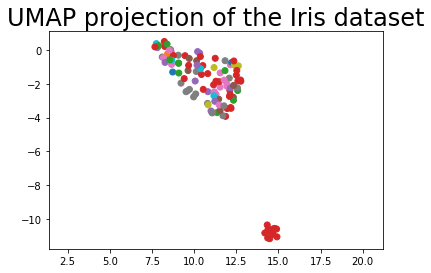

In [86]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[(sns.color_palette()*9)[x] for x in df[query_filter].peptide_cat])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

In [82]:
df.peptide_cat.unique().shape

(88,)

In [84]:
len(sns.color_palette()*10)

100